In [1]:
from fairworkflows import FairStep, FairWorkflow, fairstep

# Load a FairStep from a nanopub description

In [4]:
step = FairStep.from_nanopub(uri='http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step')

In [5]:
print(step)

Step URI = http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step
@prefix ns1: <http://purl.org/dc/terms/> .

_:Nce7af6056b0840c68e36347739c059f5 {
    [] a <http://dkm.fbk.eu/index.php/BPMN2_Ontology#ManualTask>,
            <http://purl.org/net/p-plan#Step> ;
        ns1:description "Preheat an oven to 350 degrees F (175 degrees C)." .
}




In [6]:
step.validate()

In [7]:
step.is_pplan_step

True

In [8]:
step.description

rdflib.term.Literal('Preheat an oven to 350 degrees F (175 degrees C).')

In [9]:
step.is_manual_task

True

In [10]:
step.is_script_task

False

# Create a FairWorkflow
Then add a few steps to it.

In [11]:
# Create a workflow
workflow = FairWorkflow(description='This is a test workflow.')

In [13]:
# Load some steps from nanopublications
preheat_oven = FairStep.from_nanopub(uri='http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step')
melt_butter = FairStep.from_nanopub(uri='http://purl.org/np/RANBLu3UN2ngnjY5Hzrn7S5GpqFdz8_BBy92bDlt991X4#step')
arrange_chicken = FairStep.from_nanopub(uri='http://purl.org/np/RA5D8NzM2OXPZAWNlADQ8hZdVu1k0HnmVmgl20apjhU8M#step')

In [14]:
# Specify ordering of steps
workflow.add(melt_butter, follows=preheat_oven)
workflow.add(arrange_chicken, follows=melt_butter)

In [15]:
# Does it validate? No.
workflow.validate()

AssertionError: Plan RDF does not specify a first step (pwo:hasFirstStep)


In [16]:
# Specify the first step in the plan
workflow.first_step = preheat_oven

In [17]:
# Print workflow rdf
print(workflow)

Workflow URI = None
@prefix ns1: <http://purl.org/dc/terms/> .
@prefix ns2: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#> .
@prefix ns3: <http://purl.org/spar/pwo#> .

_:N612b47f4eba54fc3bd74f2cfcd438c98 {
    <http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step> ns2:precedes <http://purl.org/np/RANBLu3UN2ngnjY5Hzrn7S5GpqFdz8_BBy92bDlt991X4#step> .

    <http://purl.org/np/RANBLu3UN2ngnjY5Hzrn7S5GpqFdz8_BBy92bDlt991X4#step> ns2:precedes <http://purl.org/np/RA5D8NzM2OXPZAWNlADQ8hZdVu1k0HnmVmgl20apjhU8M#step> .

    [] a <http://purl.org/net/p-plan#Plan> ;
        ns1:description "This is a test workflow." ;
        ns3:hasFirstStep <http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step> .
}




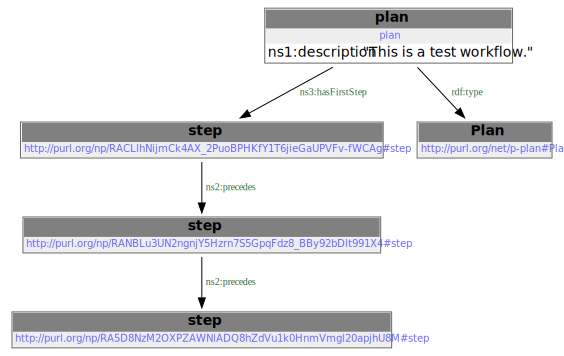

In [18]:
# What does the graph look like?
workflow.display()

# What if we want to add computational steps?
You can convert a python function to a FairStep and add it to the plex workflow.

In [19]:
# Define your computational step as a function
def a_computational_step(x, y):
    """A test function that adds two numbers"""
    return x + y

In [21]:
# Make it a FairStep and add it to the workflow
new_step = FairStep.from_function(a_computational_step)
workflow.add(new_step)

# Alternatively, use the @fairstep decorator
Use the decorator on any function that defines a computational step you wish to carry out. Each time it is called, a FairStep describing that step will be created and added to the plex workflow. This includes any input variables and their values.

In [22]:
@fairstep(workflow)
def another_computational_step(a, b):
    """Another script task"""
    return a * b

In [23]:
# Run the step
another_computational_step(1, 5)

In [24]:
# Run it again with different inputs
another_computational_step(4, 3)

In [25]:
# Both computational steps have now been added to the plex workflow
print(workflow)

Workflow URI = None
@prefix ns1: <http://purl.org/dc/terms/> .
@prefix ns2: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#> .
@prefix ns3: <http://purl.org/spar/pwo#> .
@prefix ns4: <http://purl.org/np/RANBLu3UN2ngnjY5Hzrn7S5GpqFdz8_BBy92bDlt991X4#> .
@prefix ns5: <http://purl.org/np/RA5D8NzM2OXPZAWNlADQ8hZdVu1k0HnmVmgl20apjhU8M#> .
@prefix ns6: <http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#> .
@prefix ns7: <http://purl.org/net/p-plan#> .

_:N612b47f4eba54fc3bd74f2cfcd438c98 {
    <http://purl.org/nanopub/temp/mynanopub#functiona_computational_step1600783471.2974> ns2:precedes <http://purl.org/nanopub/temp/mynanopub#functionanother_computational_step1600783473.695151> .

    <http://purl.org/nanopub/temp/mynanopub#functionanother_computational_step1600783473.695151> ns2:precedes <http://purl.org/nanopub/temp/mynanopub#functionanother_computational_step1600783474.34345> .

    ns6:step ns2:precedes <http://purl.org/nanopub/temp/mynanopub#functiona_computatio

# Walking the workflow graph
We can now ask the FairWorkflow object to give us each step of the workflow we have constructed, one at a time. This is in the correct order (taking into account precedence defined earlier).

In [26]:
for step in workflow:
    print(step)

Step URI = http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step
@prefix ns1: <http://purl.org/dc/terms/> .

_:N084d5e1976ad47a9a36db85fa2a2f85e {
    [] a <http://dkm.fbk.eu/index.php/BPMN2_Ontology#ManualTask>,
            <http://purl.org/net/p-plan#Step> ;
        ns1:description "Preheat an oven to 350 degrees F (175 degrees C)." .
}


Step URI = http://purl.org/np/RANBLu3UN2ngnjY5Hzrn7S5GpqFdz8_BBy92bDlt991X4#step
@prefix ns1: <http://purl.org/dc/terms/> .
@prefix ns2: <http://purl.org/net/p-plan#> .

_:N7e017ecf9de641b995d8ada586ab6a58 {
    [] a <http://dkm.fbk.eu/index.php/BPMN2_Ontology#ManualTask>,
            ns2:Step ;
        ns1:description "Melt the butter in a skillet over medium heat. Add the apple and onion to the melted butter, season with the curry powder, and cook and stir until the apple and onion are tender, 7 to 10 minutes. Stir the mushroom soup and half-and-half into the mixture until completely combined; spoon over the chicken pieces." ;
    